# rGADEM 
- document: https://bioconductor.org/packages/release/bioc/vignettes/rGADEM/inst/doc/rGADEM.pdf
- paper: https://www.ncbi.nlm.nih.gov/pubmed/19193149

In [77]:
source("https://bioconductor.org/biocLite.R") 
library(BiocInstaller) 

Bioconductor version 3.7 (BiocInstaller 1.30.0), ?biocLite for help
A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help


In [62]:
# BiocManager::install("RCurl")
# BiocManager::install("rGADEM")
# BiocManager::install("BSgenome.Scerevisiae.UCSC.sacCer3")

Bioconductor version 3.8 (BiocManager 1.30.4), R 3.5.2 (2018-12-20)
Installing package(s) 'BSgenome.Scerevisiae.UCSC.sacCer3'
installation path not writeable, unable to update packages: MASS, Matrix, boot,
  cluster, foreign, mgcv, nlme, rpart
Update old packages: 'BH', 'BiocInstaller', 'IRdisplay', 'IRkernel',
  'Matching', 'PerformanceAnalytics', 'R6', 'Rcpp', 'RcppEigen', 'TSP',
  'assertthat', 'backports', 'betareg', 'bookdown', 'broom', 'callr', 'car',
  'clipr', 'colorspace', 'commonmark', 'covr', 'cowplot', 'curl', 'data.table',
  'dbplyr', 'deSolve', 'devEMF', 'devtools', 'digest', 'dplyr', 'e1071',
  'emmeans', 'evaluate', 'exactRankTests', 'fansi', 'flexmix', 'flexsurv',
  'forcats', 'foreach', 'fs', 'generics', 'ggformula', 'ggplot2', 'ggpubr',
  'ggrepel', 'ggsignif', 'ggstance', 'git2r', 'glue', 'gmailr', 'gtable',
  'haven', 'hexbin', 'highr', 'hms', 'httpuv', 'httr', 'hunspell', 'inum',
  'irr', 'iterators', 'jsonlite', 'keras', 'knitr', 'labelled', 'lava',
  'lazyeval',

In [68]:
library(RCurl) 
library(rGADEM)  
library(BSgenome.Scerevisiae.UCSC.sacCer3)

In [69]:
BED <- read.table("MACS2Result/swi6_mock_corrected_peaks.narrowPeak",header=FALSE,sep="\t") 
BED <- data.frame(chr=as.factor(BED[,1]),start=as.numeric(BED[,2]),end=as.numeric(BED[,3])) 

In [72]:
rgBED <-IRanges(start=BED[,2],end=BED[,3]) 
Sequences <- RangedData(rgBED,space=BED[,1]) 

In [73]:
gadem <- rGADEM::GADEM(Sequences,verbose=1,genome=BSgenome.Scerevisiae.UCSC.sacCer3) 

Retrieving sequences... Done.
*** Start C Programm ***
input sequence file:  
number of sequences and average length:				55  89.2
Use pgf method to approximate llr null distribution
parameters estimated from sequences in:  

number of GA generations & population size:			5 100

PWM score p-value cutoff for binding site declaration:		2.000000e-04
ln(E-value) cutoff for motif declaration:			0.000000

number of EM steps:						40
minimal no. sites considered for a motif:			2

[a,c,g,t] frequencies in input data:				0.303846 0.196154 0.196154 0.303846
*** Running an unseeded analysis ***
GADEM cycle  1: enumerate and count k-mers... top 3  4, 5-mers: 10 1 12
Done.
Initializing GA... Done.
GADEM cycle[  1] generation[  1] number of unique motif: 1
   spacedDyad: aacgcnnnnnnnntcgcg   motifConsensus: rACGCGAAAwTTyTskss    0.20 fitness:    6.97

GADEM cycle[  1] generation[  2] number of unique motif: 1
   spacedDyad: cgcgngcgcg           motifConsensus: nGkGwGGGkG            0.90 fitness:    5.

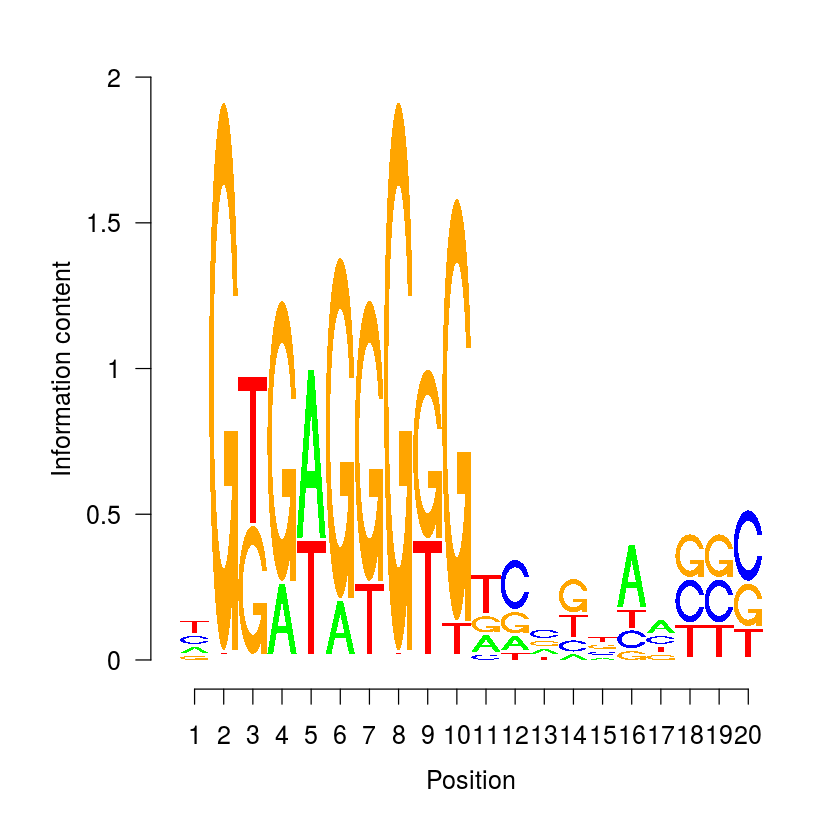

In [74]:
plot(gadem@motifList[[1]]) 